## Get the data

In [123]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

In [118]:
try:
    # for pyhton file .py
    PATH = Path(__file__).resolve().parent.parent
except NameError:
    # For Jupyter Notebook
    PATH = Path().resolve().parent.parent

with open(PATH / "config.json", "r") as f:
    VARIABLES = json.load(f)

# path of the folder with .parquet
folder_path = Path(VARIABLES["file_path_sampled_box_builder_dataset"])

In [120]:
feature_frame = pd.read_csv(folder_path)

## Initial checks

In [121]:
feature_frame.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [7]:
feature_frame.isnull().sum()  # count values null
# There aren't missed values

variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0
std_days_to_

In [25]:
feature_frame.nunique()  # number of values uniques for column

variant_id                           976
product_type                          62
order_id                            3446
user_id                             1937
created_at                          3446
order_date                           149
user_order_seq                        20
outcome                                2
ordered_before                         2
abandoned_before                       2
active_snoozed                         2
set_as_regular                         2
normalised_price                     127
discount_pct                         526
vendor                               264
global_popularity                   5968
count_adults                           5
count_children                         4
count_babies                           2
count_pets                             5
people_ex_baby                         5
days_since_purchase_variant_id       142
avg_days_to_buy_variant_id           122
std_days_to_buy_variant_id           819
days_since_purch

## hypothesis testing

In [ ]:
# Distribution fo the outcome (purchased or not)
feature_frame["outcome"].value_counts(normalize=True)

outcome
0.0    0.988463
1.0    0.011537
Name: proportion, dtype: float64

In [105]:
catergorical_cols = ["product_type", "vendor"]
feature_frame[catergorical_cols].describe()

,product_type,vendor
count,2880549,2880549
unique,62,264
top,tinspackagedfoods,biona
freq,226474,146828


<Axes: xlabel='abandoned_before'>

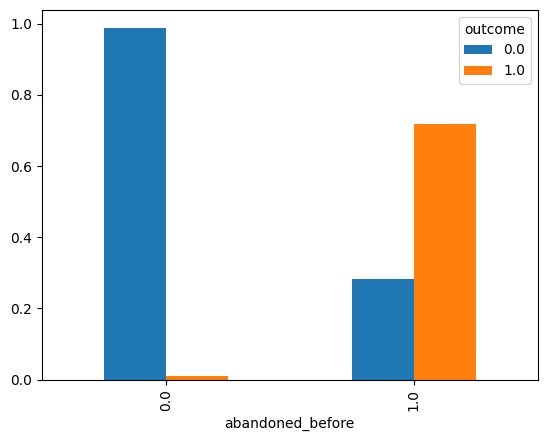

In [ ]:
# the abandoned products (abandoned_before) have more probability to be purchased later?
feature_frame.groupby("abandoned_before")["outcome"].value_counts(
    normalize=True
).unstack().plot(kind="bar")

In [127]:
# what is the probability that if there is a 1 in outcome, there will be a 1 or a 0 in the other binary variables
for column in [
    "ordered_before",
    "abandoned_before",
    "active_snoozed",
    "set_as_regular",
]:
    probability = feature_frame[column].value_counts(normalize=True)
    print(f"Probability of {column} if outcome is 1: {probability[1]*100 :.2f}%")
    print(f"Probability of {column} if outcome is 0: {probability[0]*100 :.2f}%")
    print()

Probability of ordered_before if outcome is 1: 2.11%
Probability of ordered_before if outcome is 0: 97.89%

Probability of abandoned_before if outcome is 1: 0.06%
Probability of abandoned_before if outcome is 0: 99.94%

Probability of active_snoozed if outcome is 1: 0.23%
Probability of active_snoozed if outcome is 0: 99.77%

Probability of set_as_regular if outcome is 1: 0.36%
Probability of set_as_regular if outcome is 0: 99.64%



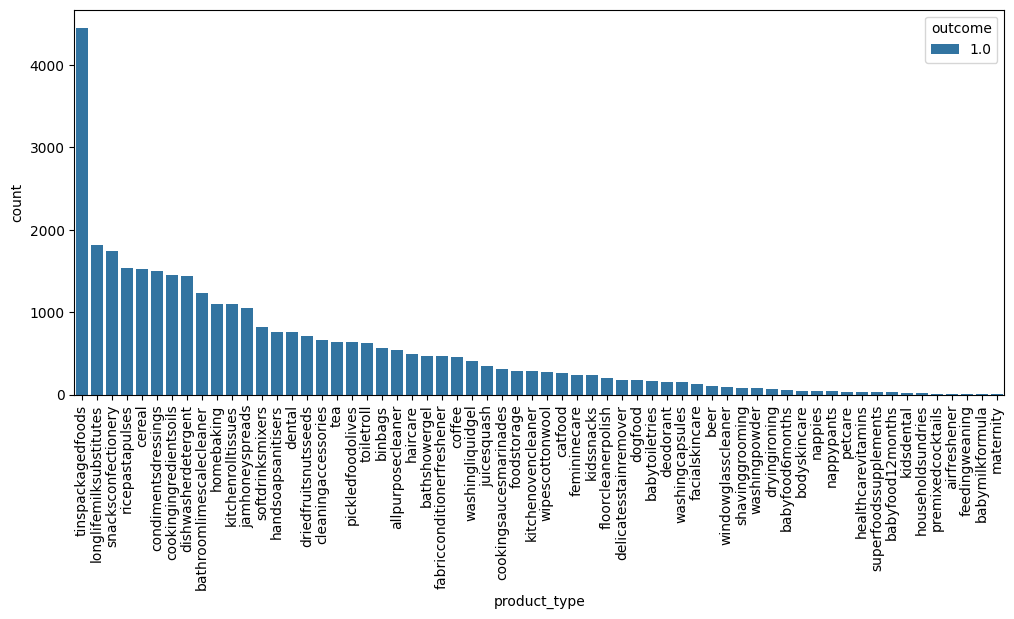

In [ ]:
# The type-products with more purchases
plt.figure(figsize=(12, 5))
product_order = (
    feature_frame[feature_frame["outcome"] == 1]["product_type"].value_counts().index
)
sns.countplot(
    data=feature_frame[feature_frame["outcome"] == 1],
    x="product_type",
    hue="outcome",
    order=product_order,
)
plt.xticks(rotation=90)
plt.show()

In [131]:
columns = [
    "user_order_seq",
    "normalised_price",
    "discount_pct",
    "global_popularity",
    "count_adults",
    "count_children",
    "count_babies",
    "count_pets",
    "people_ex_baby",
]

<Axes: >

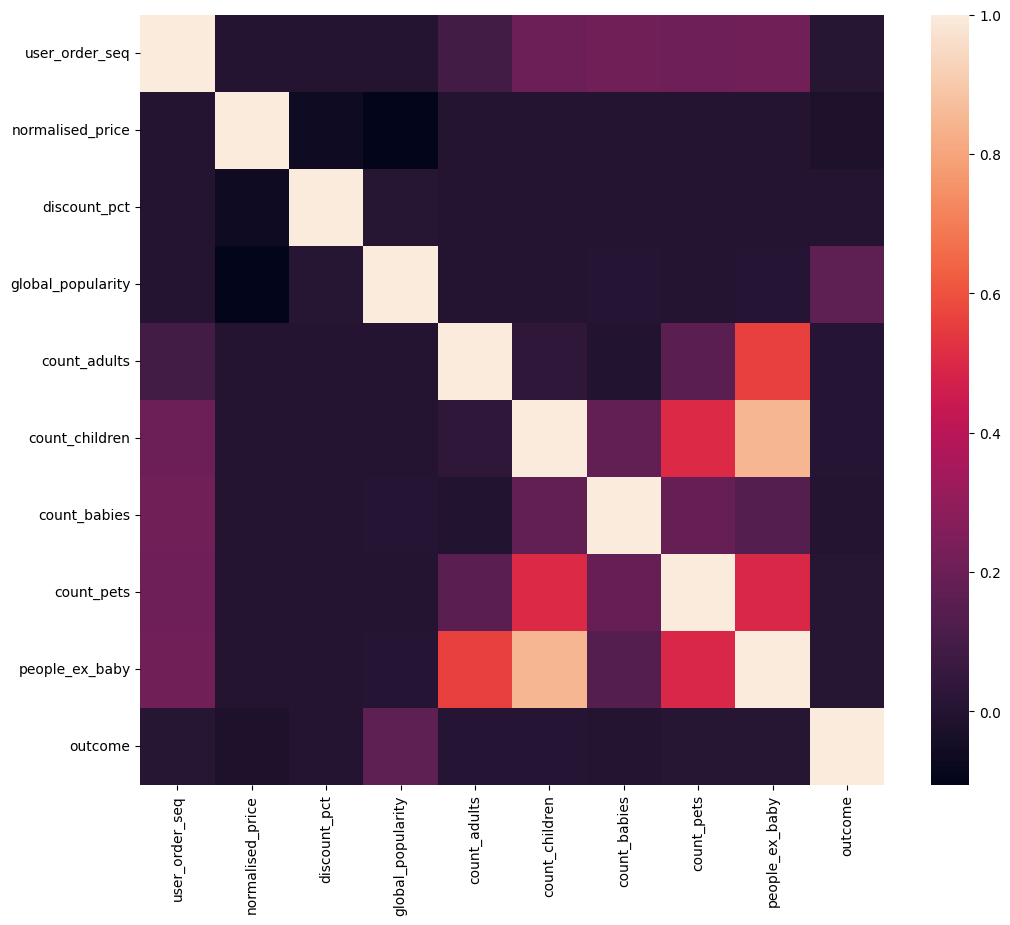

In [132]:
# compute the correlaction matrix
corr = feature_frame[columns + ["outcome"]].corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr)

<Axes: xlabel='count_adults', ylabel='Density'>

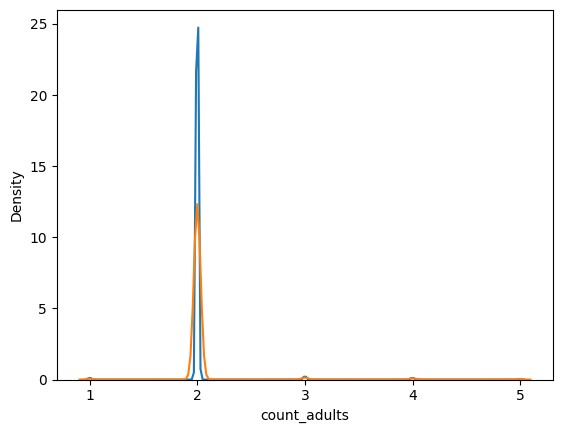

In [138]:
# Visualizing the distribution of outcome 1 and 0 for column "count_adults"
sns.kdeplot(feature_frame.loc[lambda x: x.outcome == 0, "count_adults"], label="0")
sns.kdeplot(feature_frame.loc[lambda x: x.outcome == 1, "count_adults"], label="1")

# Insights
* The outcome distribution (orders purchased and not) is very unbalanced, leaving a ratio of 99 to 1
* It is more probably that a purchase to be made if the product has been purchased previously compared to other metrics measured such as abandoned, snoozed, or set as regular
* Best selling product tinspackagedfoods, best selling vendor biona
* There is a correlation where families with more children tend to have more pets.
* The number of people (not counting babies) is also correlated with the number of pets
* The distribution of outcome with count_adults shows an inconsistent increase at value 2, because most of the values in this column were imputed from the main survey, affecting the analysis results.